In [30]:
from sklearn.manifold import TSNE
import numpy as np
import matplotlib.pyplot as plt

In [31]:
#load the data matrics
matrix_2st = np.loadtxt('right2st.txt')
print('2 state scenario matrics has the shape:',matrix_2st.shape)

2 state scenario matrics has the shape: (6312, 14)


In [32]:
a = matrix_2st[np.where(matrix_2st[:,0]==4),:]

In [8]:
a

array([[[4., 2., 3., ..., 0., 2., 0.],
        [4., 3., 0., ..., 0., 0., 3.],
        [4., 3., 0., ..., 0., 0., 3.],
        ...,
        [4., 6., 3., ..., 0., 4., 2.],
        [4., 6., 3., ..., 0., 6., 0.],
        [4., 6., 4., ..., 0., 3., 3.]]])

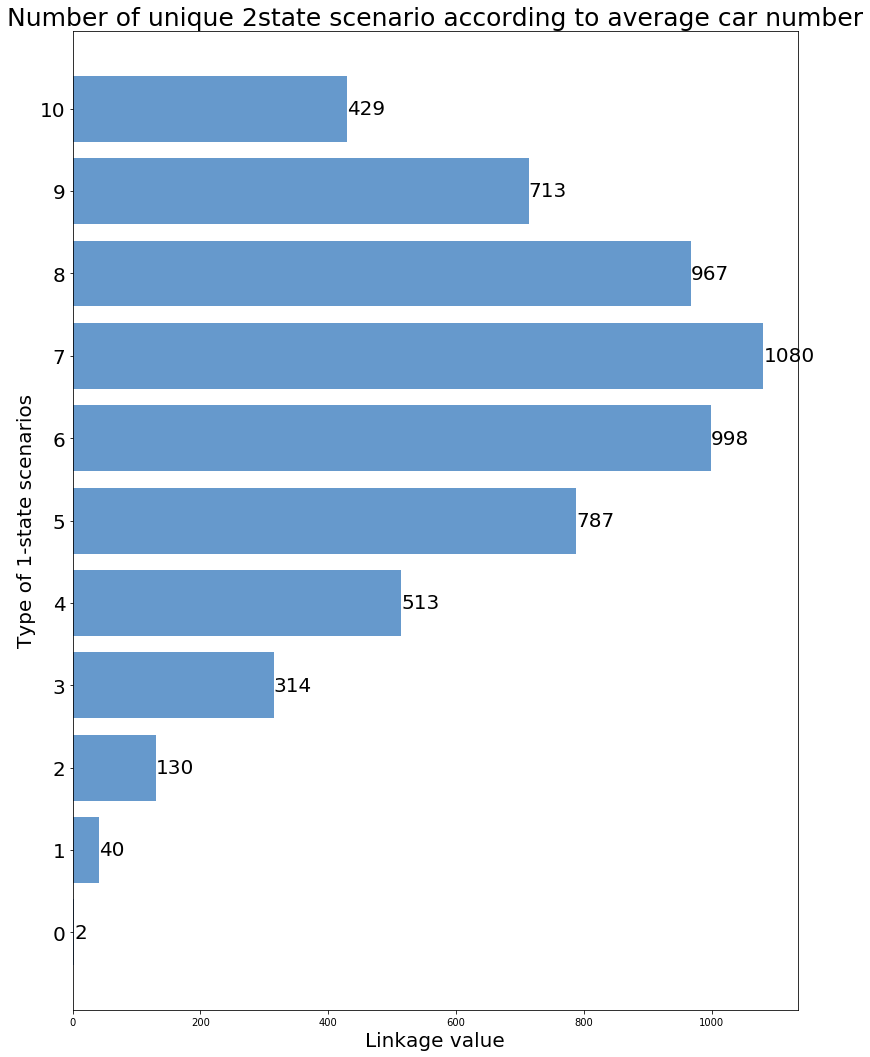

In [86]:
fig, ax = plt.subplots(figsize=(13,18))
value = []
for i in range(11):
    num = matrix_2st[np.where(matrix_2st[:,0]==i),:].shape[1]
    value.append(num)
f = ax.barh(range(11), value, color='#6699CC')
for rect in f:
    w = rect.get_width()
    ax.text(w, rect.get_y()+rect.get_height()/2, '%d' %
            int(w-1), ha='left', va='center', fontsize = 20)
ax.set_yticks(range(11))
ax.set_yticklabels(range(11),fontsize = 20)
ax.set_title("Number of unique 2state scenario according to average car number",fontsize = 25)
plt.ylabel('Type of 1-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
plt.show()

In [11]:
car1 = matrix_2st[np.where(matrix_2st[:,0]==1),:]
car1 = car1[:,1:]
car1 = np.squeeze(car1,axis= (0,))
str1 = ";".join(str(i) for i in car1)
str1 = str1.split(";")
str1

['[1. 0. 1. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0. 0. 1.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 1. 0.]',
 '[1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 0. 1. 0. 0.]',
 '[1. 1. 0. 1. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]',
 '[1. 1. 0. 1. 0. 1. 0. 0. 1. 0. 0. 1. 0. 0.]',
 '[1. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 0. 1. 0.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 0. 2. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 0. 1. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 0. 2.]',
 '[1. 2. 0. 0. 1. 0. 0. 1. 1. 0. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 0. 2. 0. 2. 0.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 0. 1. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1.]',
 '[1. 2. 0. 0. 1. 0. 1. 0. 1. 0. 1. 0. 2. 0.]',
 '[1. 2. 0. 0. 1. 1. 0. 0. 0. 0. 2. 2. 0. 0.]',
 '[1. 2. 0. 0. 1. 1. 0. 0. 0. 1. 1. 2. 0. 0.]',
 '[1. 2. 0. 0. 1. 1. 0. 0. 2. 0. 0. 2. 0

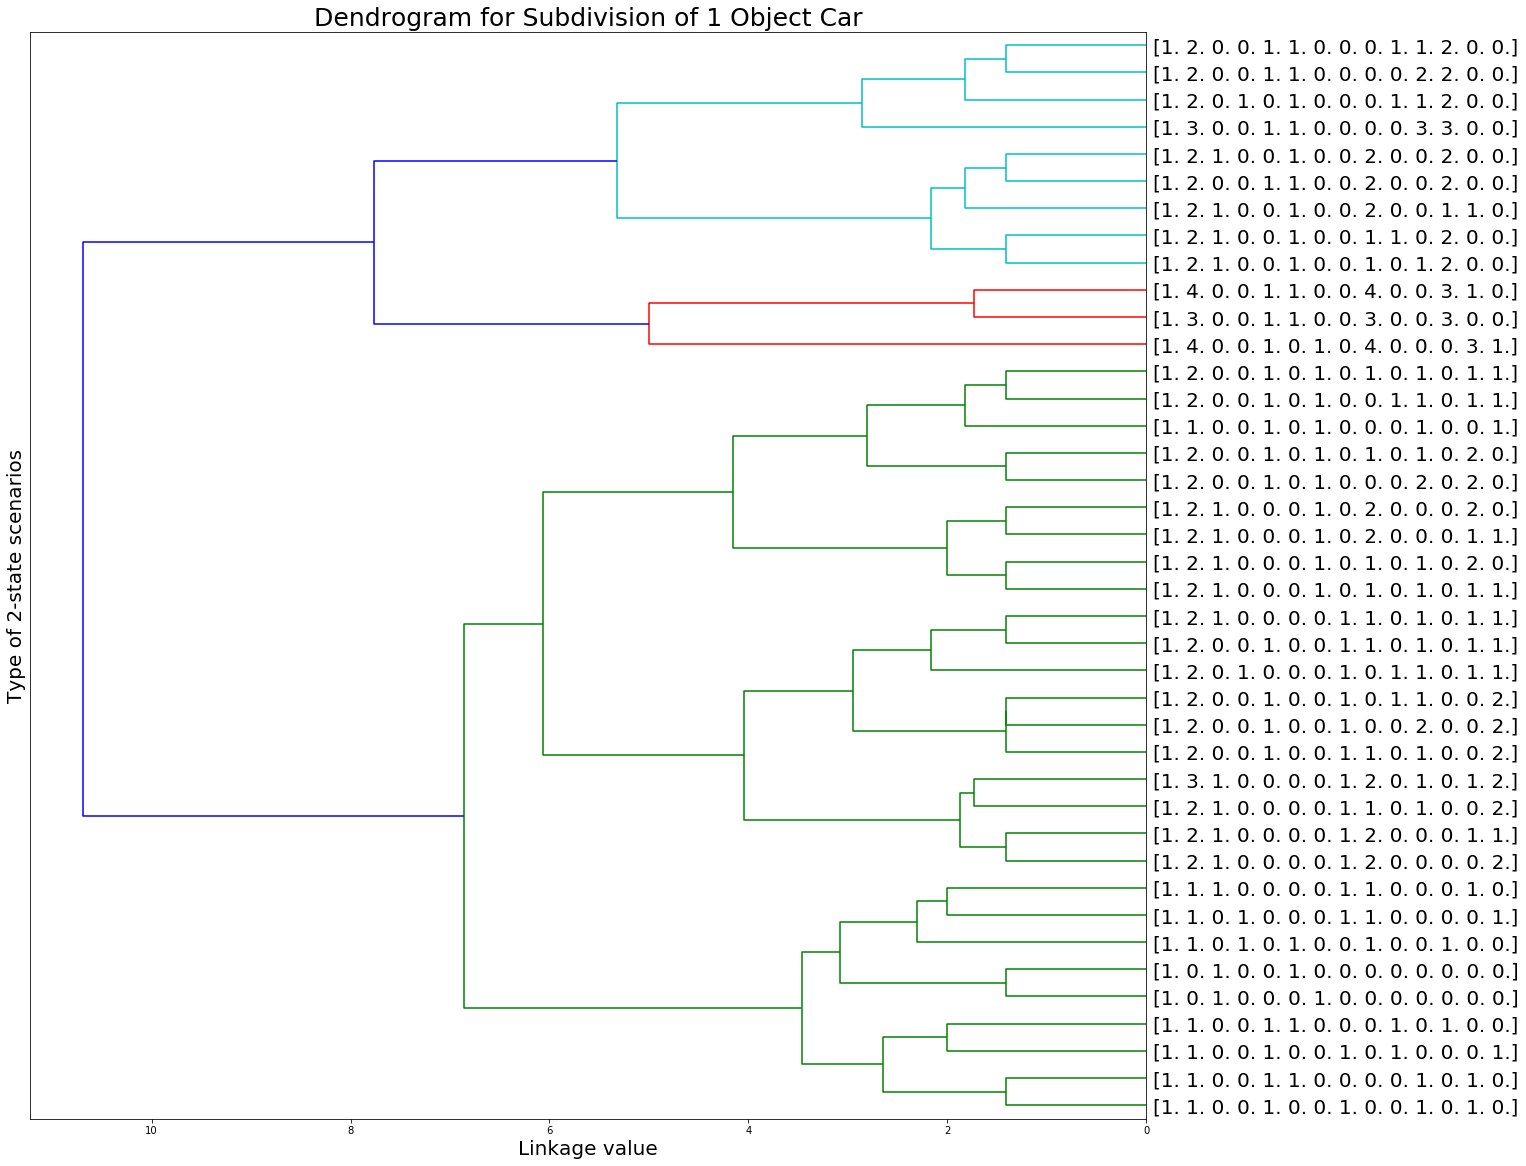

(39, 4)


In [85]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car1, 'ward')
f = fcluster(Z,0.0001,'distance')
fig = plt.figure(figsize=(20, 20))
plt.title('Dendrogram for Subdivision of 1 Object Car',fontsize = 25)
plt.ylabel('Type of 2-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
dn = dendrogram(Z,labels=str1,orientation='left', leaf_rotation=0,
              leaf_font_size=20)
plt.show()

print(Z.shape)

In [83]:
def fancy_dendrogram(*args, **kwargs):
    max_d = kwargs.pop('max_d', None)
    if max_d and 'color_threshold' not in kwargs:
        kwargs['color_threshold'] = max_d
    annotate_above = kwargs.pop('annotate_above', 0)

    ddata = dendrogram(*args, **kwargs)

    if not kwargs.get('no_plot', False):
        plt.title('Hierarchical Clustering Dendrogram on 2-state scenario (truncated)',fontsize = 20)
        plt.xlabel('sample index',fontsize = 20)
        plt.ylabel('dissimilarity',fontsize = 20)
        for i, d, c in zip(ddata['icoord'], ddata['dcoord'], ddata['color_list']):
            x = 0.5 * sum(i[1:3])
            y = d[1]
            if y > annotate_above:
                plt.plot(x, y, 'o', c=c)
                plt.annotate("%.3g" % y, (x, y), xytext=(0, -5),
                             textcoords='offset points',
                             va='top', ha='center')
        if max_d:
            plt.axhline(y=max_d, c='k')
    return ddata

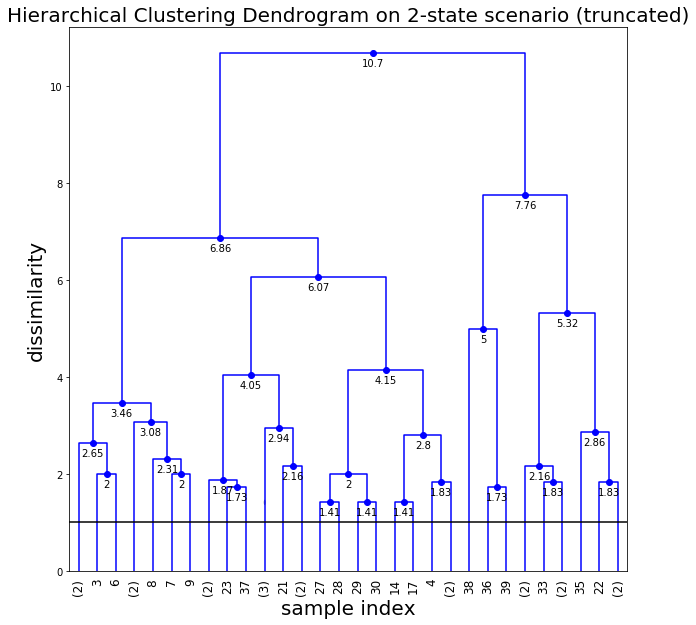

In [84]:
plt.figure(figsize=(10,10))
fancy_dendrogram(
    Z,
    truncate_mode='lastp',
    p=30,
    leaf_rotation=90.,
    leaf_font_size=12.,
 #   orientation = 'left',
    show_contracted=True,
    annotate_above=1,
    max_d=1,
)
plt.show()

In [14]:
car2 = matrix_2st[np.where(matrix_2st[:,0]==2),:]
car2 = car2[:,1:]
car2 = np.squeeze(car2,axis= (0,))
str2 = ";".join(str(i) for i in car2)
str2 = str2.split(";")
str2

['[2. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 0. 1.]',
 '[2. 1. 0. 0. 2. 0. 1. 1. 0. 0. 1. 0. 1. 0.]',
 '[2. 1. 0. 0. 2. 0. 2. 0. 0. 0. 1. 0. 1. 0.]',
 '[2. 1. 0. 0. 2. 2. 0. 0. 0. 0. 1. 1. 0. 0.]',
 '[2. 1. 0. 1. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]',
 '[2. 1. 1. 0. 1. 0. 0. 2. 1. 0. 0. 0. 0. 1.]',
 '[2. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0. 1.]',
 '[2. 1. 1. 0. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0.]',
 '[2. 1. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 0. 1.]',
 '[2. 1. 1. 0. 1. 0. 2. 0. 0. 0. 1. 0. 1. 0.]',
 '[2. 1. 1. 0. 1. 0. 2. 0. 1. 0. 0. 0. 1. 0.]',
 '[2. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1. 0.]',
 '[2. 1. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.]',
 '[2. 1. 1. 0. 1. 2. 0. 0. 0. 0. 1. 1. 0. 0.]',
 '[2. 1. 1. 1. 0. 1. 1. 0. 0. 1. 0. 1. 0. 0.]',
 '[2. 1. 2. 0. 0. 0. 0. 2. 1. 0. 0. 0. 0. 1.]',
 '[2. 1. 2. 0. 0. 0. 0. 2. 1. 0. 0. 0. 1. 0.]',
 '[2. 1. 2. 0. 0. 0. 2. 0. 1. 0. 0. 0. 1. 0.]',
 '[2. 1. 2. 0. 0. 1. 0. 1. 1. 0. 0. 1. 0. 0.]',
 '[2. 1. 2. 0. 0. 2. 0. 0. 1. 0. 0. 1. 0. 0.]',
 '[2. 2. 0. 0. 2. 0. 0. 2. 0. 0. 2. 0. 1

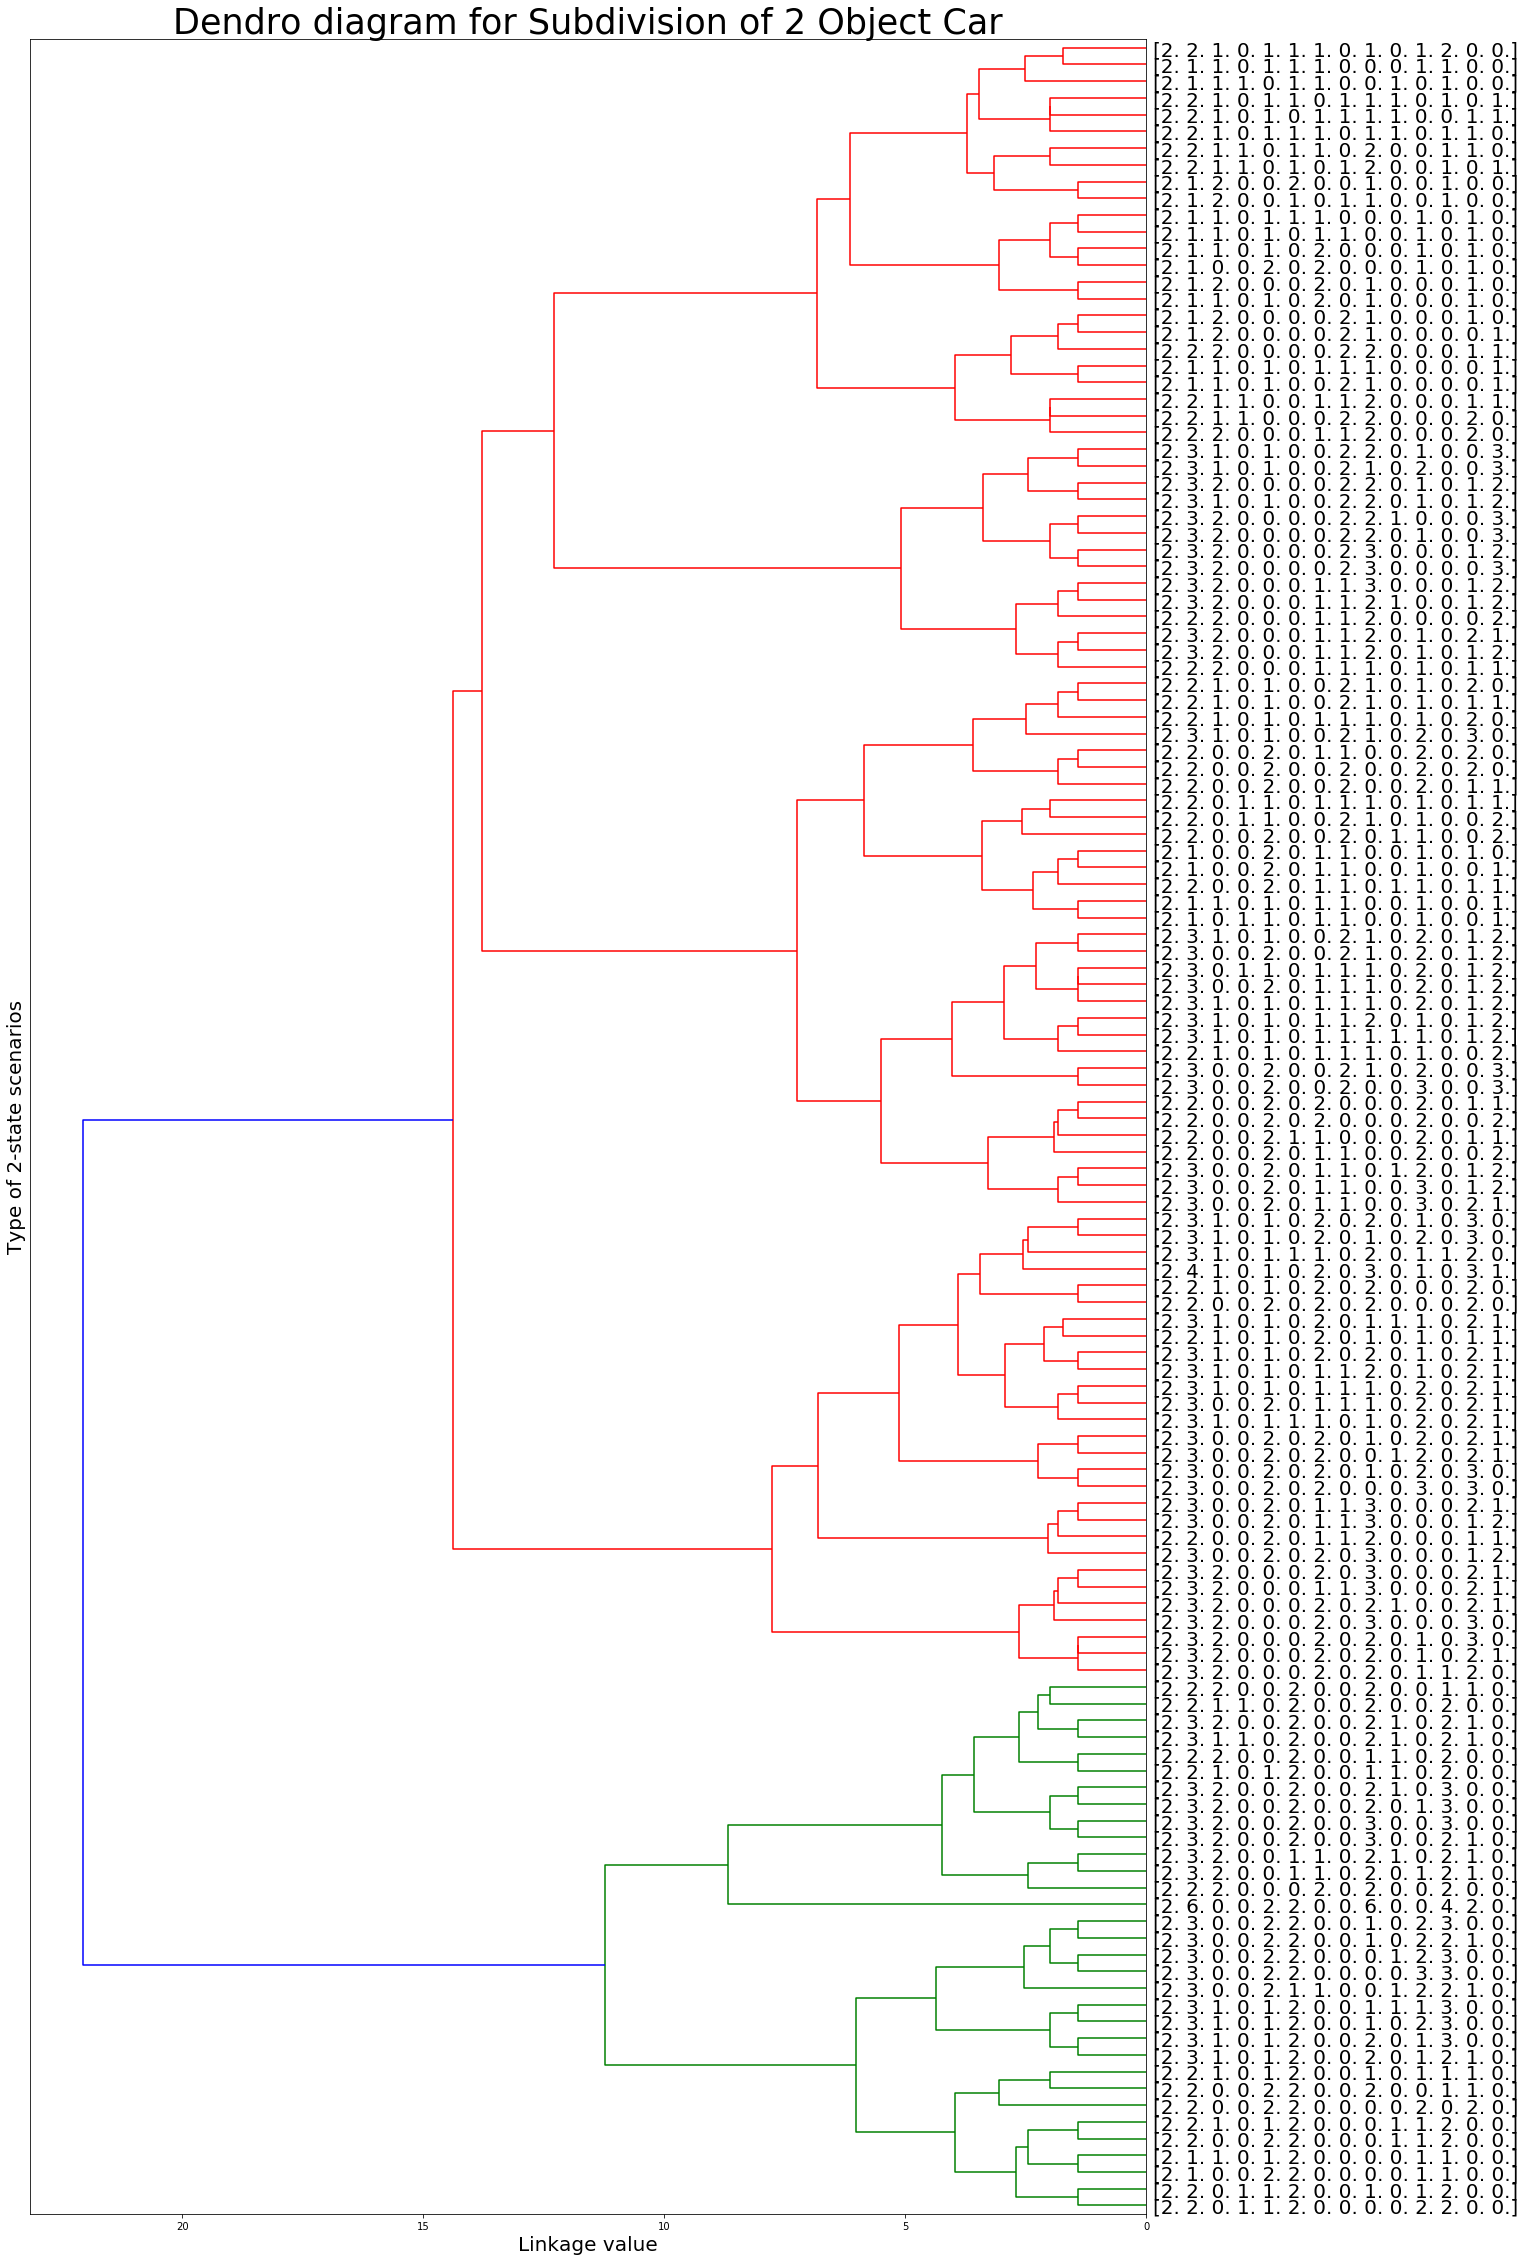

(129, 4)


In [49]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car2, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 40))
plt.title('Dendro diagram for Subdivision of 2 Object Car',fontsize = 35)
plt.ylabel('Type of 2-state scenarios',fontsize = 20)
plt.xlabel('Linkage value',fontsize = 20)
dn = dendrogram(Z,labels=str2, orientation='left', leaf_rotation=0,
              leaf_font_size=20)
plt.show()
print(Z.shape)

In [51]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))


[[  0.           1.           1.41421356   2.        ]
 [  2.           9.           1.41421356   2.        ]
 [  4.           6.           1.41421356   2.        ]
 [  7.          11.           1.41421356   2.        ]
 [ 66.          68.           1.41421356   2.        ]
 [  3.          13.           1.41421356   2.        ]
 [  5.           8.           1.41421356   2.        ]
 [ 69.          83.           1.41421356   2.        ]
 [ 71.          72.           1.41421356   2.        ]
 [ 89.         137.           1.41421356   3.        ]
 [ 91.          92.           1.41421356   2.        ]
 [ 15.          16.           1.41421356   2.        ]
 [ 38.          39.           1.41421356   2.        ]
 [ 70.          90.           1.41421356   2.        ]
 [ 93.          96.           1.41421356   2.        ]
 [ 10.          17.           1.41421356   2.        ]
 [ 88.         106.           1.41421356   2.        ]
 [108.         109.           1.41421356   2.        ]
 [ 18.    

45

In [33]:
car3 = matrix_2st[np.where(matrix_2st[:,0]==3),:]
car3 = car3[:,1:]
car3 = np.squeeze(car3,axis= (0,))
str3 = ";".join(str(i) for i in car3)
str3 = str3.split(";")
str3

['[3. 1. 2. 0. 1. 2. 1. 0. 1. 0. 0. 1. 0. 0.]',
 '[3. 2. 0. 0. 3. 0. 0. 3. 0. 0. 2. 0. 0. 2.]',
 '[3. 2. 0. 0. 3. 0. 1. 2. 0. 0. 2. 0. 0. 2.]',
 '[3. 2. 0. 0. 3. 0. 1. 2. 0. 0. 2. 0. 1. 1.]',
 '[3. 2. 0. 0. 3. 0. 1. 2. 2. 0. 0. 0. 0. 2.]',
 '[3. 2. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 1. 1.]',
 '[3. 2. 0. 0. 3. 0. 2. 1. 0. 0. 2. 0. 2. 0.]',
 '[3. 2. 0. 0. 3. 0. 2. 1. 2. 0. 0. 0. 1. 1.]',
 '[3. 2. 0. 0. 3. 0. 3. 0. 0. 0. 2. 0. 2. 0.]',
 '[3. 2. 0. 0. 3. 1. 2. 0. 0. 0. 2. 1. 1. 0.]',
 '[3. 2. 0. 0. 3. 2. 1. 0. 2. 0. 0. 1. 1. 0.]',
 '[3. 2. 0. 0. 3. 2. 1. 0. 2. 0. 0. 2. 0. 0.]',
 '[3. 2. 0. 0. 3. 3. 0. 0. 0. 0. 2. 2. 0. 0.]',
 '[3. 2. 0. 1. 2. 0. 1. 2. 0. 0. 2. 0. 1. 1.]',
 '[3. 2. 1. 0. 2. 0. 0. 3. 1. 0. 1. 0. 0. 2.]',
 '[3. 2. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 0. 2.]',
 '[3. 2. 1. 0. 2. 0. 1. 2. 0. 0. 2. 0. 1. 1.]',
 '[3. 2. 1. 0. 2. 0. 1. 2. 1. 0. 1. 0. 0. 2.]',
 '[3. 2. 1. 0. 2. 0. 1. 2. 1. 0. 1. 0. 1. 1.]',
 '[3. 2. 1. 0. 2. 0. 2. 1. 0. 0. 2. 0. 1. 1.]',
 '[3. 2. 1. 0. 2. 0. 2. 1. 0. 0. 2. 0. 2

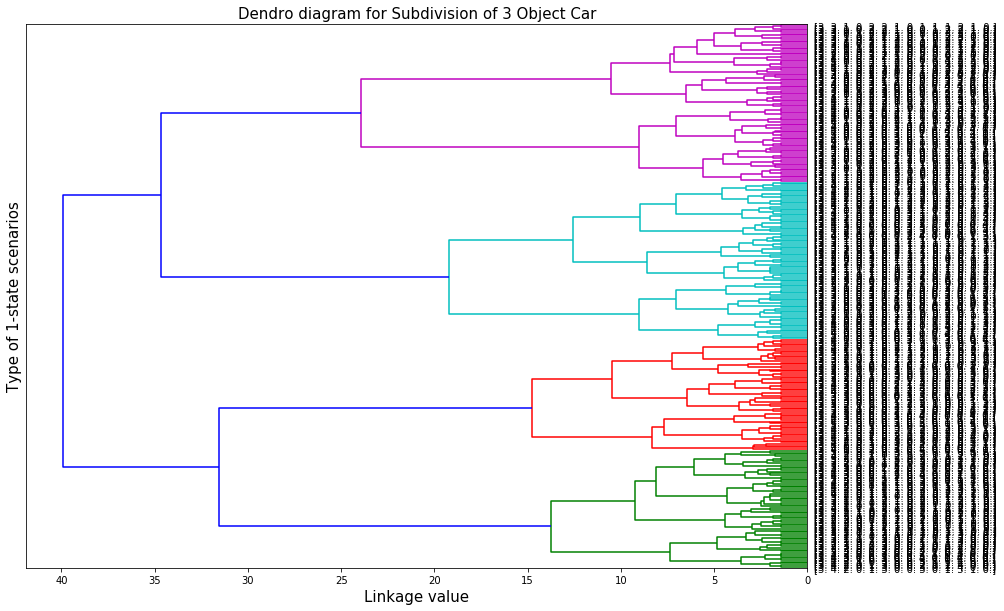

(313, 4)


In [52]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car3, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(14, 10))
plt.title('Dendro diagram for Subdivision of 3 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str3, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [57]:
np.set_printoptions(threshold=10000)
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[ 41.          42.           1.41421356   2.        ]
 [ 43.          44.           1.41421356   2.        ]
 [ 45.          57.           1.41421356   2.        ]
 [  1.           2.           1.41421356   2.        ]
 [  3.           5.           1.41421356   2.        ]
 [ 15.          16.           1.41421356   2.        ]
 [ 59.          60.           1.41421356   2.        ]
 [183.         184.           1.41421356   2.        ]
 [ 62.          66.           1.41421356   2.        ]
 [186.         187.           1.41421356   2.        ]
 [188.         190.           1.41421356   2.        ]
 [ 14.          17.           1.41421356   2.        ]
 [ 18.          21.           1.41421356   2.        ]
 [ 19.          20.           1.41421356   2.        ]
 [ 95.          96.           1.41421356   2.        ]
 [211.         212.           1.41421356   2.        ]
 [213.         214.           1.41421356   2.        ]
 [ 94.          98.           1.41421356   2.        ]
 [215.    

115

In [62]:
car4 = matrix_2st[np.where(matrix_2st[:,0]==4),:]
car4 = car4[:,1:]
car4 = np.squeeze(car4,axis= (0,))
str4 = ";".join(str(i) for i in car4)
str4 = str4.split(";")
str4

['[4. 3. 0. 0. 4. 0. 0. 4. 0. 0. 3. 0. 0. 3.]',
 '[4. 3. 0. 0. 4. 0. 1. 3. 0. 0. 3. 0. 0. 3.]',
 '[4. 3. 0. 0. 4. 0. 1. 3. 0. 0. 3. 0. 1. 2.]',
 '[4. 3. 0. 0. 4. 0. 2. 2. 0. 0. 3. 0. 1. 2.]',
 '[4. 3. 0. 0. 4. 0. 2. 2. 0. 0. 3. 0. 2. 1.]',
 '[4. 3. 0. 0. 4. 0. 3. 1. 0. 0. 3. 0. 2. 1.]',
 '[4. 3. 0. 0. 4. 0. 3. 1. 0. 0. 3. 0. 3. 0.]',
 '[4. 3. 0. 0. 4. 0. 4. 0. 0. 0. 3. 0. 3. 0.]',
 '[4. 3. 0. 0. 4. 0. 4. 0. 3. 0. 0. 0. 3. 0.]',
 '[4. 3. 0. 0. 4. 1. 3. 0. 3. 0. 0. 0. 3. 0.]',
 '[4. 3. 0. 0. 4. 2. 2. 0. 3. 0. 0. 1. 2. 0.]',
 '[4. 3. 0. 0. 4. 3. 1. 0. 0. 0. 3. 3. 0. 0.]',
 '[4. 3. 0. 0. 4. 3. 1. 0. 3. 0. 0. 1. 2. 0.]',
 '[4. 3. 0. 0. 4. 4. 0. 0. 0. 0. 3. 3. 0. 0.]',
 '[4. 3. 0. 1. 3. 0. 1. 3. 0. 1. 2. 0. 0. 3.]',
 '[4. 3. 1. 0. 3. 0. 0. 4. 1. 0. 2. 0. 0. 3.]',
 '[4. 3. 1. 0. 3. 0. 1. 3. 0. 0. 3. 0. 1. 2.]',
 '[4. 3. 1. 0. 3. 0. 1. 3. 1. 0. 2. 0. 0. 3.]',
 '[4. 3. 1. 0. 3. 0. 1. 3. 1. 0. 2. 0. 1. 2.]',
 '[4. 3. 1. 0. 3. 0. 2. 2. 0. 0. 3. 0. 1. 2.]',
 '[4. 3. 1. 0. 3. 0. 2. 2. 0. 0. 3. 0. 2

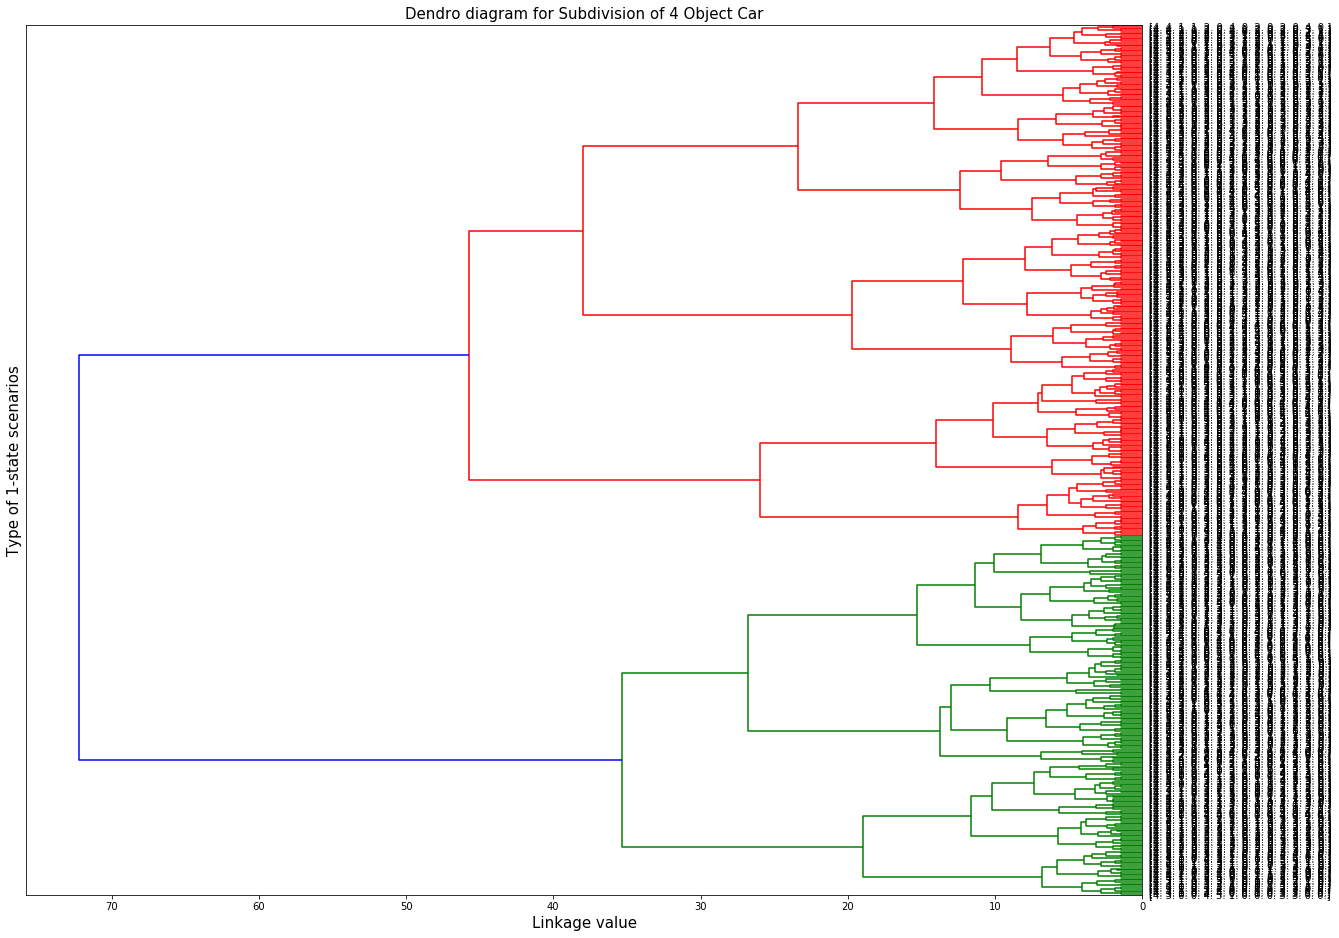

(512, 4)


In [63]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car4, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 16))
plt.title('Dendro diagram for Subdivision of 4 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str4, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [66]:
Z
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

180

In [67]:
car5 = matrix_2st[np.where(matrix_2st[:,0]==5),:]
car5 = car5[:,1:]
car5 = np.squeeze(car5,axis= (0,))
str5 = ";".join(str(i) for i in car5)
str5 = str5.split(";")
str5

['[5. 2. 0. 0. 5. 0. 5. 0. 2. 0. 0. 0. 2. 0.]',
 '[5. 3. 0. 0. 5. 0. 3. 2. 3. 0. 0. 0. 2. 1.]',
 '[5. 3. 0. 0. 5. 0. 5. 0. 3. 0. 0. 0. 3. 0.]',
 '[5. 3. 0. 1. 4. 0. 4. 1. 0. 0. 3. 0. 3. 0.]',
 '[5. 3. 1. 0. 4. 0. 4. 1. 0. 0. 3. 0. 3. 0.]',
 '[5. 3. 2. 0. 3. 0. 2. 3. 1. 0. 2. 0. 2. 1.]',
 '[5. 3. 4. 0. 1. 0. 5. 0. 1. 0. 2. 0. 3. 0.]',
 '[5. 4. 0. 0. 5. 0. 0. 5. 0. 0. 4. 0. 0. 4.]',
 '[5. 4. 0. 0. 5. 0. 1. 4. 0. 0. 4. 0. 0. 4.]',
 '[5. 4. 0. 0. 5. 0. 1. 4. 0. 0. 4. 0. 1. 3.]',
 '[5. 4. 0. 0. 5. 0. 1. 4. 0. 0. 4. 0. 2. 2.]',
 '[5. 4. 0. 0. 5. 0. 2. 3. 0. 0. 4. 0. 1. 3.]',
 '[5. 4. 0. 0. 5. 0. 2. 3. 0. 0. 4. 0. 2. 2.]',
 '[5. 4. 0. 0. 5. 0. 2. 3. 0. 0. 4. 0. 3. 1.]',
 '[5. 4. 0. 0. 5. 0. 3. 2. 0. 0. 4. 0. 2. 2.]',
 '[5. 4. 0. 0. 5. 0. 3. 2. 0. 0. 4. 0. 3. 1.]',
 '[5. 4. 0. 0. 5. 0. 4. 1. 0. 0. 4. 0. 3. 1.]',
 '[5. 4. 0. 0. 5. 0. 4. 1. 0. 0. 4. 0. 4. 0.]',
 '[5. 4. 0. 0. 5. 0. 5. 0. 0. 0. 4. 0. 4. 0.]',
 '[5. 4. 0. 0. 5. 0. 5. 0. 4. 0. 0. 0. 4. 0.]',
 '[5. 4. 0. 0. 5. 2. 3. 0. 0. 0. 4. 1. 3

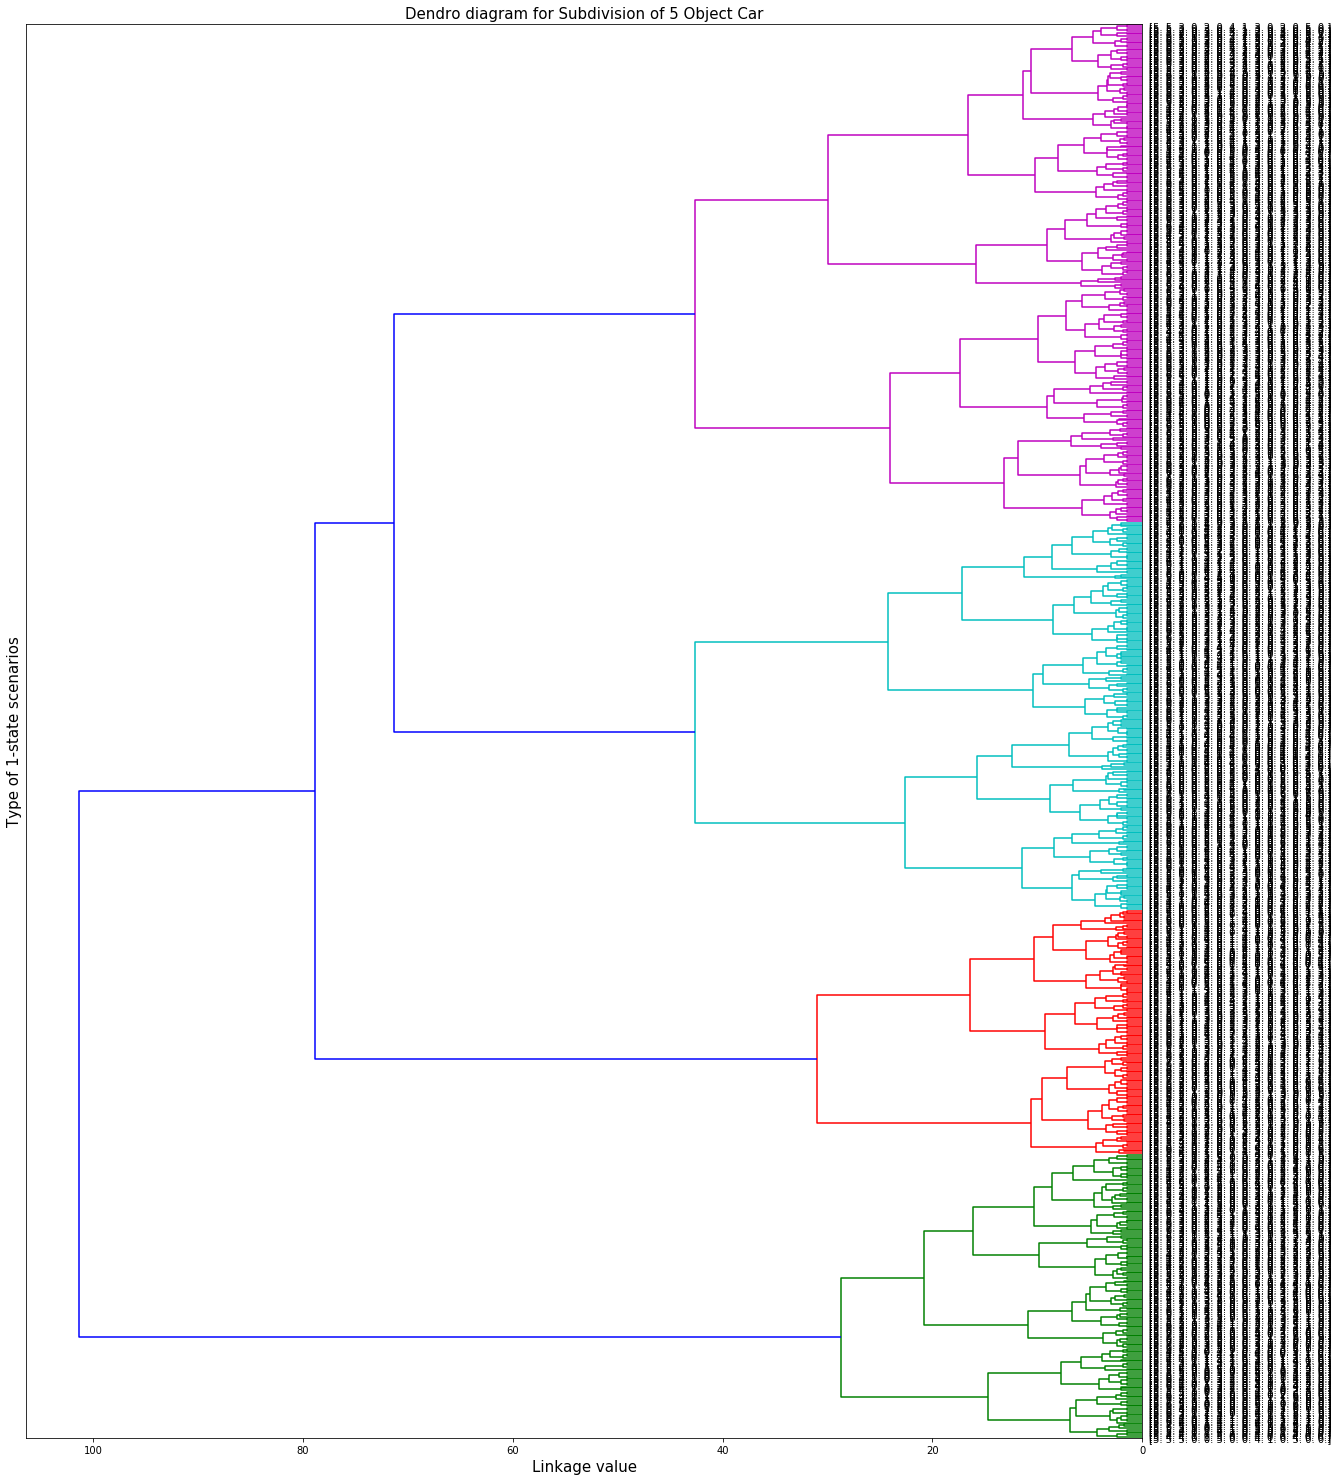

(786, 4)


In [77]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car5, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 26))
plt.title('Dendro diagram for Subdivision of 5 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str5, orientation='left', leaf_rotation=0,
              leaf_font_size=10)
plt.show()
print(Z.shape)

In [78]:
Z

sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

286

In [74]:
car6 = matrix_2st[np.where(matrix_2st[:,0]==6),:]
car6 = car6[:,1:]
car6 = np.squeeze(car6,axis= (0,))
str6 = ";".join(str(i) for i in car6)
str6 = str6.split(";")
str6

['[6. 4. 0. 0. 6. 3. 3. 0. 4. 0. 0. 3. 1. 0.]',
 '[6. 4. 1. 0. 5. 0. 3. 3. 0. 0. 4. 0. 3. 1.]',
 '[6. 4. 1. 0. 5. 2. 4. 0. 0. 0. 4. 1. 3. 0.]',
 '[6. 4. 1. 0. 5. 3. 3. 0. 0. 0. 4. 1. 3. 0.]',
 '[6. 4. 2. 1. 3. 6. 0. 0. 2. 0. 2. 4. 0. 0.]',
 '[6. 4. 3. 0. 3. 0. 3. 3. 2. 0. 2. 0. 3. 1.]',
 '[6. 4. 4. 0. 2. 0. 2. 4. 3. 0. 1. 0. 2. 2.]',
 '[6. 4. 4. 0. 2. 0. 4. 2. 3. 0. 1. 0. 1. 3.]',
 '[6. 4. 4. 0. 2. 5. 1. 0. 3. 0. 1. 3. 1. 0.]',
 '[6. 4. 4. 1. 1. 2. 4. 0. 3. 0. 1. 0. 4. 0.]',
 '[6. 4. 5. 0. 1. 0. 6. 0. 3. 0. 1. 0. 4. 0.]',
 '[6. 5. 0. 0. 6. 0. 1. 5. 0. 0. 5. 0. 0. 5.]',
 '[6. 5. 0. 0. 6. 0. 1. 5. 0. 0. 5. 0. 1. 4.]',
 '[6. 5. 0. 0. 6. 0. 2. 4. 0. 0. 5. 0. 1. 4.]',
 '[6. 5. 0. 0. 6. 0. 2. 4. 0. 0. 5. 0. 2. 3.]',
 '[6. 5. 0. 0. 6. 0. 3. 3. 0. 0. 5. 0. 2. 3.]',
 '[6. 5. 0. 0. 6. 0. 3. 3. 0. 0. 5. 0. 3. 2.]',
 '[6. 5. 0. 0. 6. 0. 4. 2. 0. 0. 5. 0. 3. 2.]',
 '[6. 5. 0. 0. 6. 0. 4. 2. 0. 0. 5. 0. 4. 1.]',
 '[6. 5. 0. 0. 6. 0. 5. 1. 0. 0. 5. 0. 4. 1.]',
 '[6. 5. 0. 0. 6. 0. 5. 1. 0. 0. 5. 0. 5

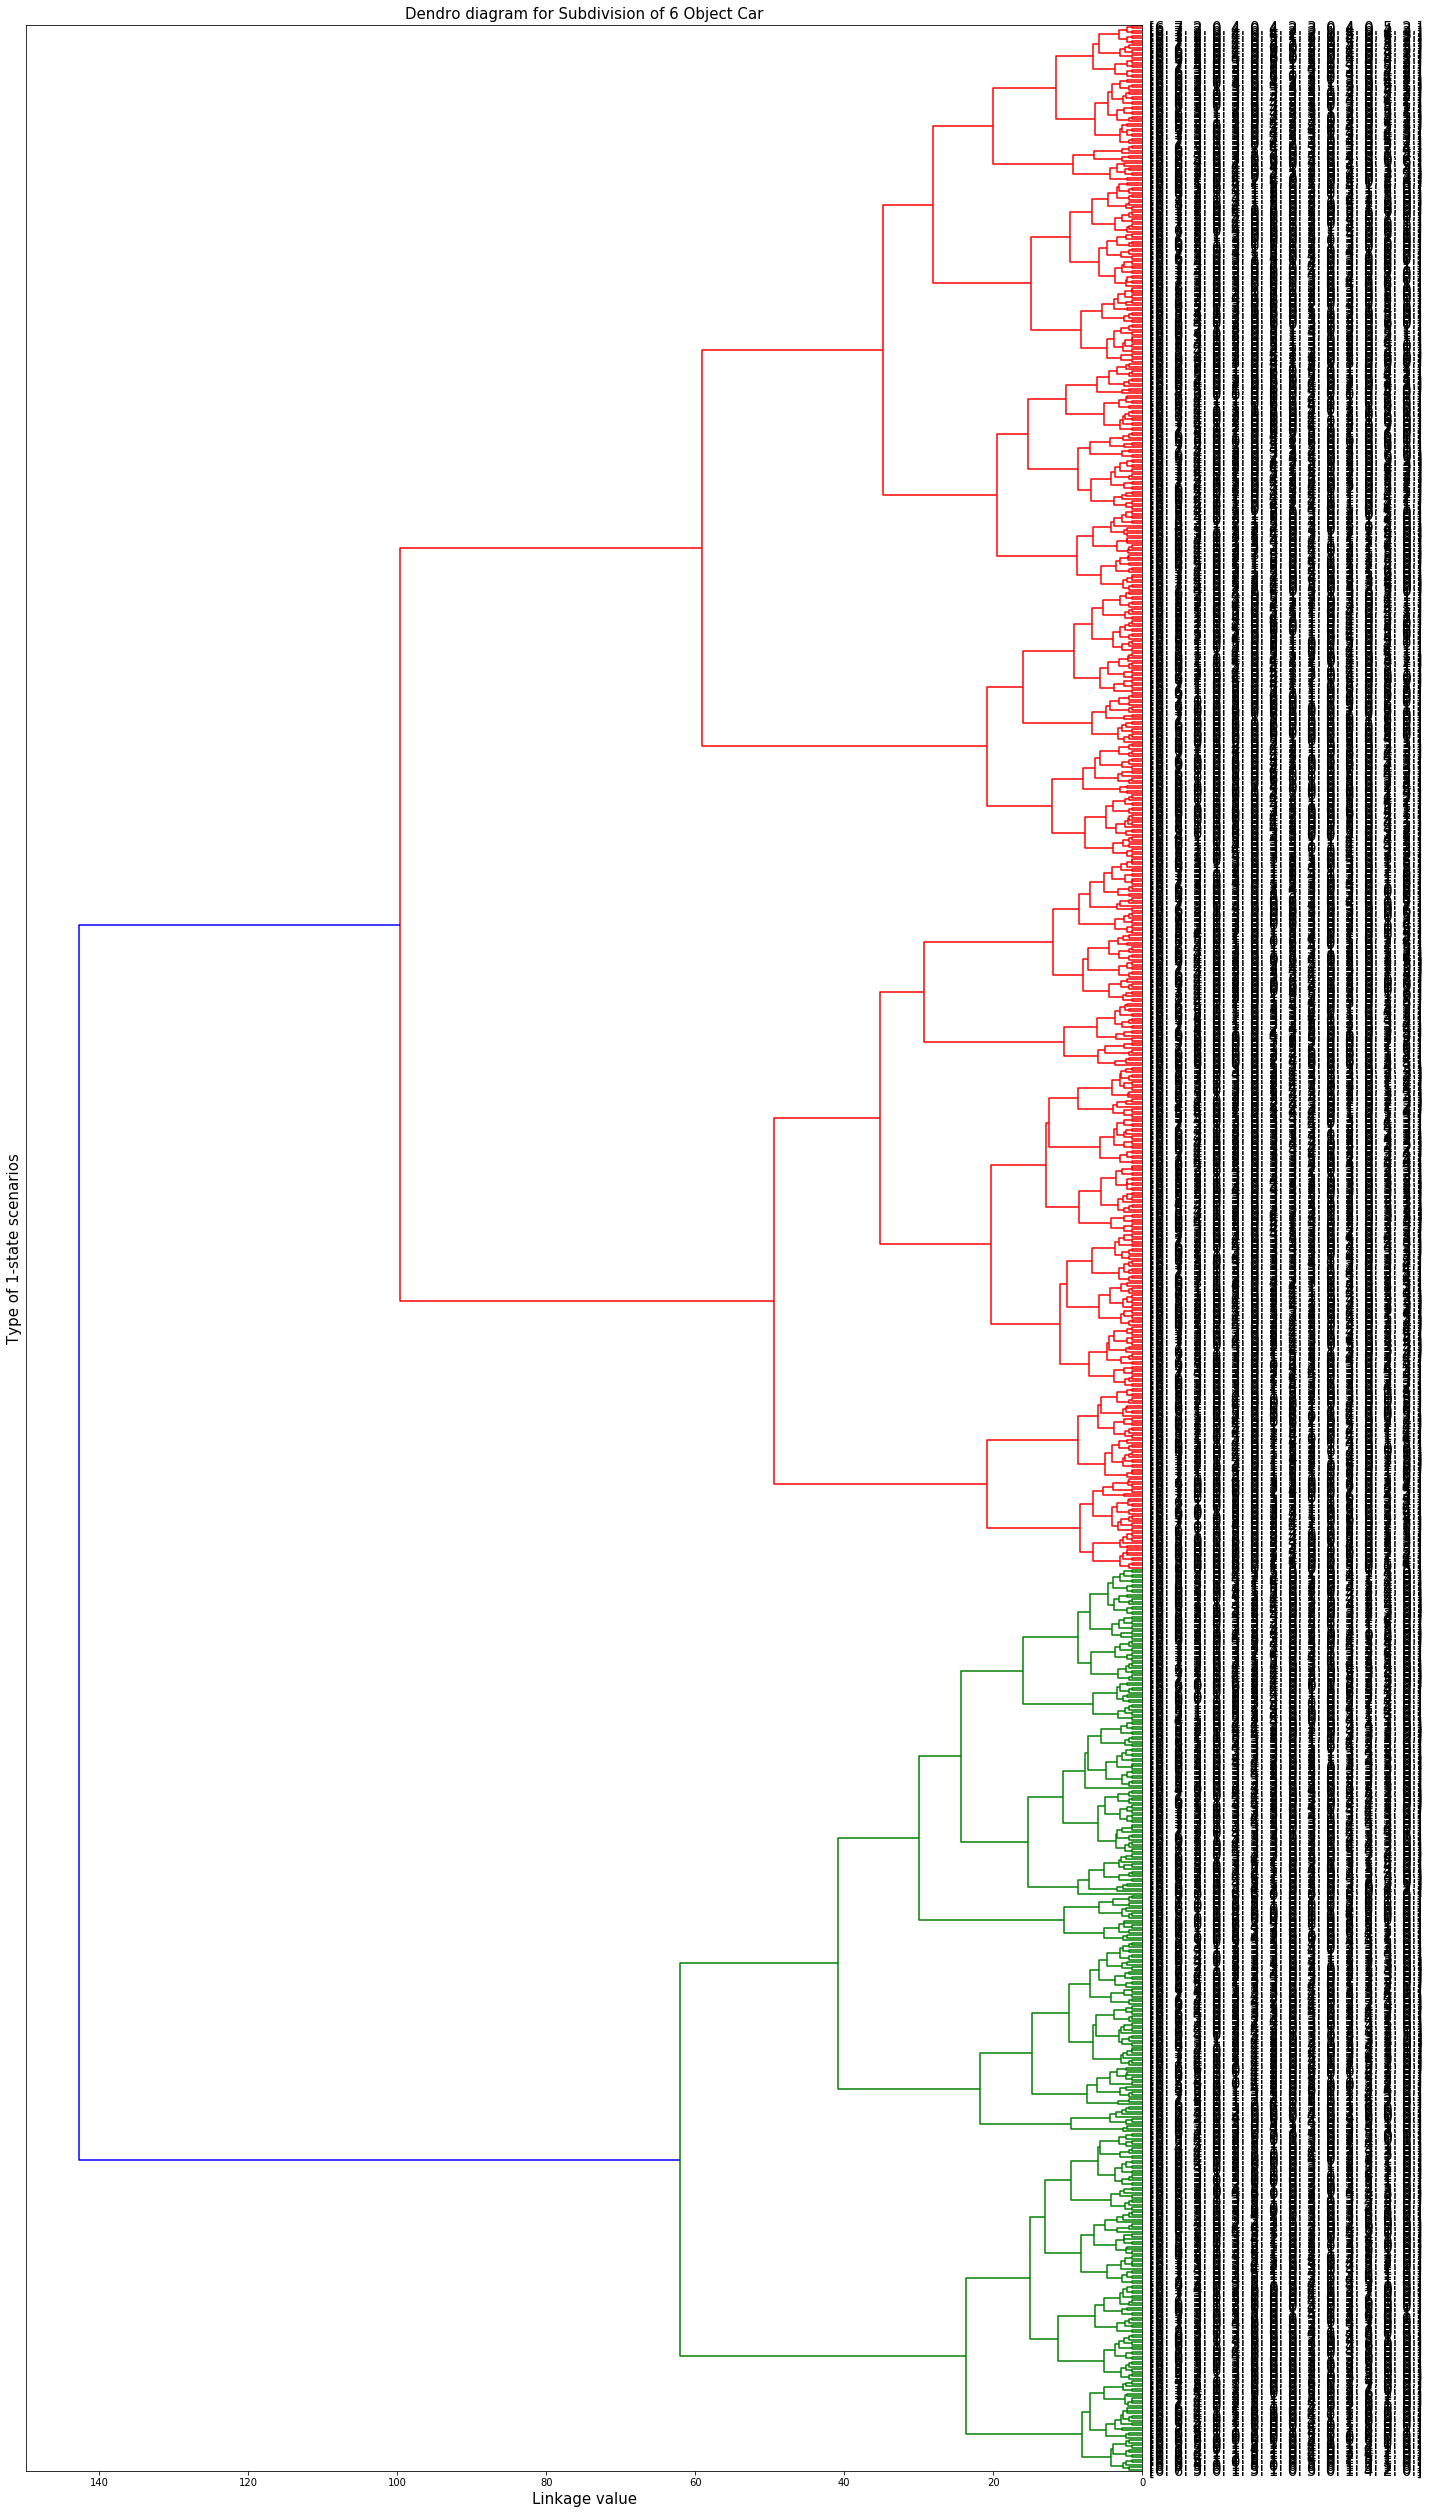

(997, 4)


In [75]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car6, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 45))
plt.title('Dendro diagram for Subdivision of 6 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str6,orientation='left', leaf_rotation=0,
              leaf_font_size=15)

plt.show()
print(Z.shape)

In [76]:
Z
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

346

In [79]:
car7 = matrix_2st[np.where(matrix_2st[:,0]==7),:]
car7 = car7[:,1:]
car7 = np.squeeze(car7, axis= (0,))
str7 = ";".join(str(i) for i in car7)
str7 = str7.split(";")
str7

['[7. 5. 0. 0. 7. 0. 4. 3. 0. 0. 5. 0. 2. 3.]',
 '[7. 5. 1. 0. 6. 0. 1. 6. 0. 0. 5. 0. 1. 4.]',
 '[7. 5. 1. 0. 6. 0. 4. 3. 0. 0. 5. 0. 3. 2.]',
 '[7. 5. 2. 0. 5. 0. 5. 2. 1. 0. 4. 0. 3. 2.]',
 '[7. 5. 2. 0. 5. 0. 6. 1. 1. 0. 4. 0. 5. 0.]',
 '[7. 5. 2. 1. 4. 1. 6. 0. 1. 0. 4. 1. 4. 0.]',
 '[7. 5. 2. 1. 4. 7. 0. 0. 2. 0. 3. 5. 0. 0.]',
 '[7. 5. 3. 0. 4. 0. 2. 5. 2. 0. 3. 0. 1. 4.]',
 '[7. 5. 3. 1. 3. 0. 5. 2. 2. 0. 3. 0. 4. 1.]',
 '[7. 5. 3. 1. 3. 5. 2. 0. 2. 0. 3. 3. 2. 0.]',
 '[7. 5. 3. 1. 3. 7. 0. 0. 3. 0. 2. 5. 0. 0.]',
 '[7. 5. 4. 0. 3. 0. 3. 4. 3. 0. 2. 0. 3. 2.]',
 '[7. 5. 5. 0. 2. 0. 7. 0. 3. 0. 2. 0. 4. 1.]',
 '[7. 6. 0. 0. 7. 0. 1. 6. 0. 0. 6. 0. 1. 5.]',
 '[7. 6. 0. 0. 7. 0. 2. 5. 0. 0. 6. 0. 2. 4.]',
 '[7. 6. 0. 0. 7. 0. 3. 4. 0. 0. 6. 0. 3. 3.]',
 '[7. 6. 0. 0. 7. 0. 4. 3. 0. 0. 6. 0. 3. 3.]',
 '[7. 6. 0. 0. 7. 0. 4. 3. 0. 0. 6. 0. 4. 2.]',
 '[7. 6. 0. 0. 7. 0. 5. 2. 0. 0. 6. 0. 4. 2.]',
 '[7. 6. 0. 0. 7. 0. 6. 1. 0. 0. 6. 0. 5. 1.]',
 '[7. 6. 0. 0. 7. 0. 7. 0. 0. 0. 6. 0. 6

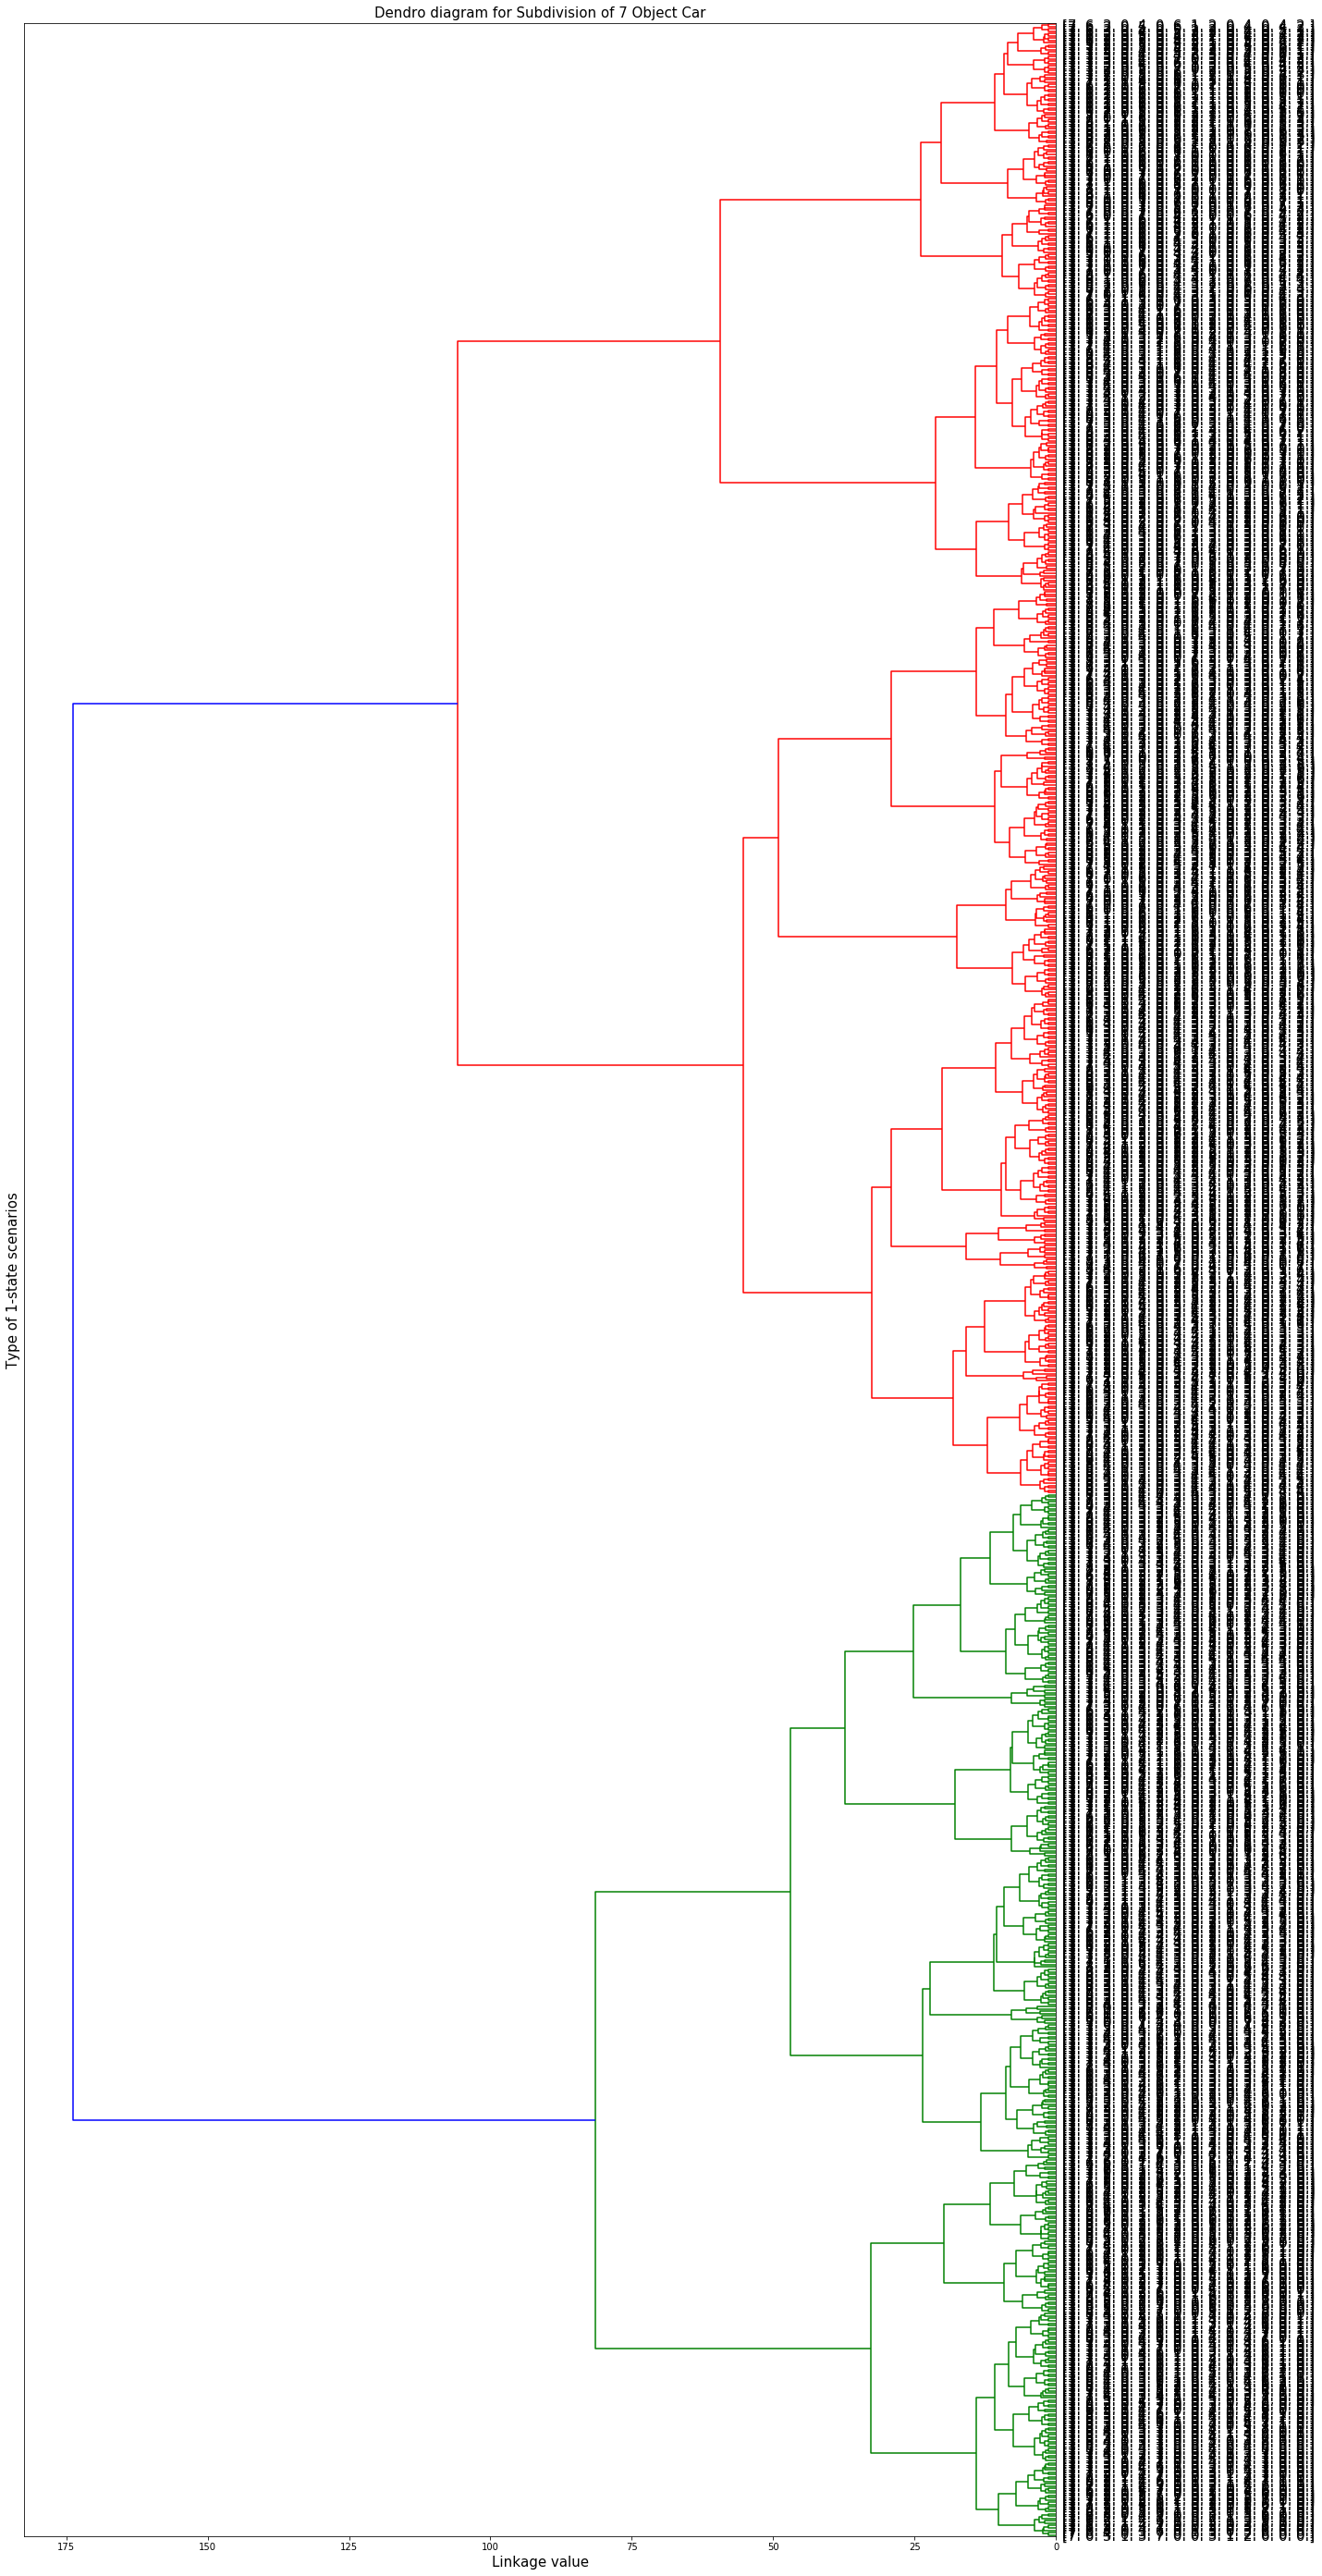

(1079, 4)


In [80]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car7, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 7 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str7, leaf_rotation=0,orientation= 'left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [81]:
print(Z)
sum((Z[:,2]>1.41)&(Z[:,2]<1.42))

[[1.50000000e+01 1.60000000e+01 1.41421356e+00 2.00000000e+00]
 [3.00000000e+01 3.10000000e+01 1.41421356e+00 2.00000000e+00]
 [2.90000000e+01 3.20000000e+01 1.41421356e+00 2.00000000e+00]
 [3.30000000e+01 3.50000000e+01 1.41421356e+00 2.00000000e+00]
 [1.70000000e+01 1.80000000e+01 1.41421356e+00 2.00000000e+00]
 [1.30000000e+01 2.40000000e+01 1.41421356e+00 2.00000000e+00]
 [2.50000000e+01 2.70000000e+01 1.41421356e+00 2.00000000e+00]
 [6.70000000e+01 7.00000000e+01 1.41421356e+00 2.00000000e+00]
 [6.90000000e+01 7.20000000e+01 1.41421356e+00 2.00000000e+00]
 [6.10000000e+01 6.60000000e+01 1.41421356e+00 2.00000000e+00]
 [3.60000000e+01 7.10000000e+01 1.41421356e+00 2.00000000e+00]
 [3.12000000e+02 3.16000000e+02 1.41421356e+00 2.00000000e+00]
 [6.50000000e+01 6.80000000e+01 1.41421356e+00 2.00000000e+00]
 [7.30000000e+01 7.80000000e+01 1.41421356e+00 2.00000000e+00]
 [1.26000000e+02 1.27000000e+02 1.41421356e+00 2.00000000e+00]
 [1.30000000e+02 1.31000000e+02 1.41421356e+00 2.000000

366

In [43]:
car8 = matrix_1st[np.where(matrix_1st[:,0]==8),:]
car8 = car8[:,1:]
car8 = np.squeeze(car8,axis= (0,))
str8 = ";".join(str(i) for i in car8)
str8 = str8.split(";")
str8

['[8. 0. 0. 8. 0. 2. 6.]',
 '[8. 0. 0. 8. 0. 3. 5.]',
 '[8. 0. 0. 8. 0. 4. 4.]',
 '[8. 0. 0. 8. 0. 5. 3.]',
 '[8. 0. 0. 8. 0. 6. 2.]',
 '[8. 0. 0. 8. 0. 7. 1.]',
 '[8. 0. 0. 8. 0. 8. 0.]',
 '[8. 0. 0. 8. 2. 6. 0.]',
 '[8. 0. 0. 8. 7. 1. 0.]',
 '[8. 0. 1. 7. 0. 4. 4.]',
 '[8. 0. 1. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 1. 7.]',
 '[8. 1. 0. 7. 0. 2. 6.]',
 '[8. 1. 0. 7. 0. 3. 5.]',
 '[8. 1. 0. 7. 0. 4. 4.]',
 '[8. 1. 0. 7. 0. 5. 3.]',
 '[8. 1. 0. 7. 0. 6. 2.]',
 '[8. 1. 0. 7. 0. 7. 1.]',
 '[8. 1. 0. 7. 0. 8. 0.]',
 '[8. 1. 0. 7. 2. 6. 0.]',
 '[8. 1. 0. 7. 3. 5. 0.]',
 '[8. 1. 1. 6. 0. 3. 5.]',
 '[8. 1. 1. 6. 0. 4. 4.]',
 '[8. 1. 1. 6. 0. 5. 3.]',
 '[8. 1. 1. 6. 0. 6. 2.]',
 '[8. 1. 1. 6. 0. 7. 1.]',
 '[8. 1. 1. 6. 2. 6. 0.]',
 '[8. 1. 1. 6. 3. 5. 0.]',
 '[8. 1. 1. 6. 4. 4. 0.]',
 '[8. 1. 1. 6. 5. 3. 0.]',
 '[8. 1. 1. 6. 6. 2. 0.]',
 '[8. 2. 0. 6. 0. 0. 8.]',
 '[8. 2. 0. 6. 0. 1. 7.]',
 '[8. 2. 0. 6. 0. 2. 6.]',
 '[8. 2. 0. 6. 0. 3. 5.]',
 '[8. 2. 0. 6. 0. 4. 4.]',
 '[8. 2. 0. 6. 0. 5. 3.]',
 

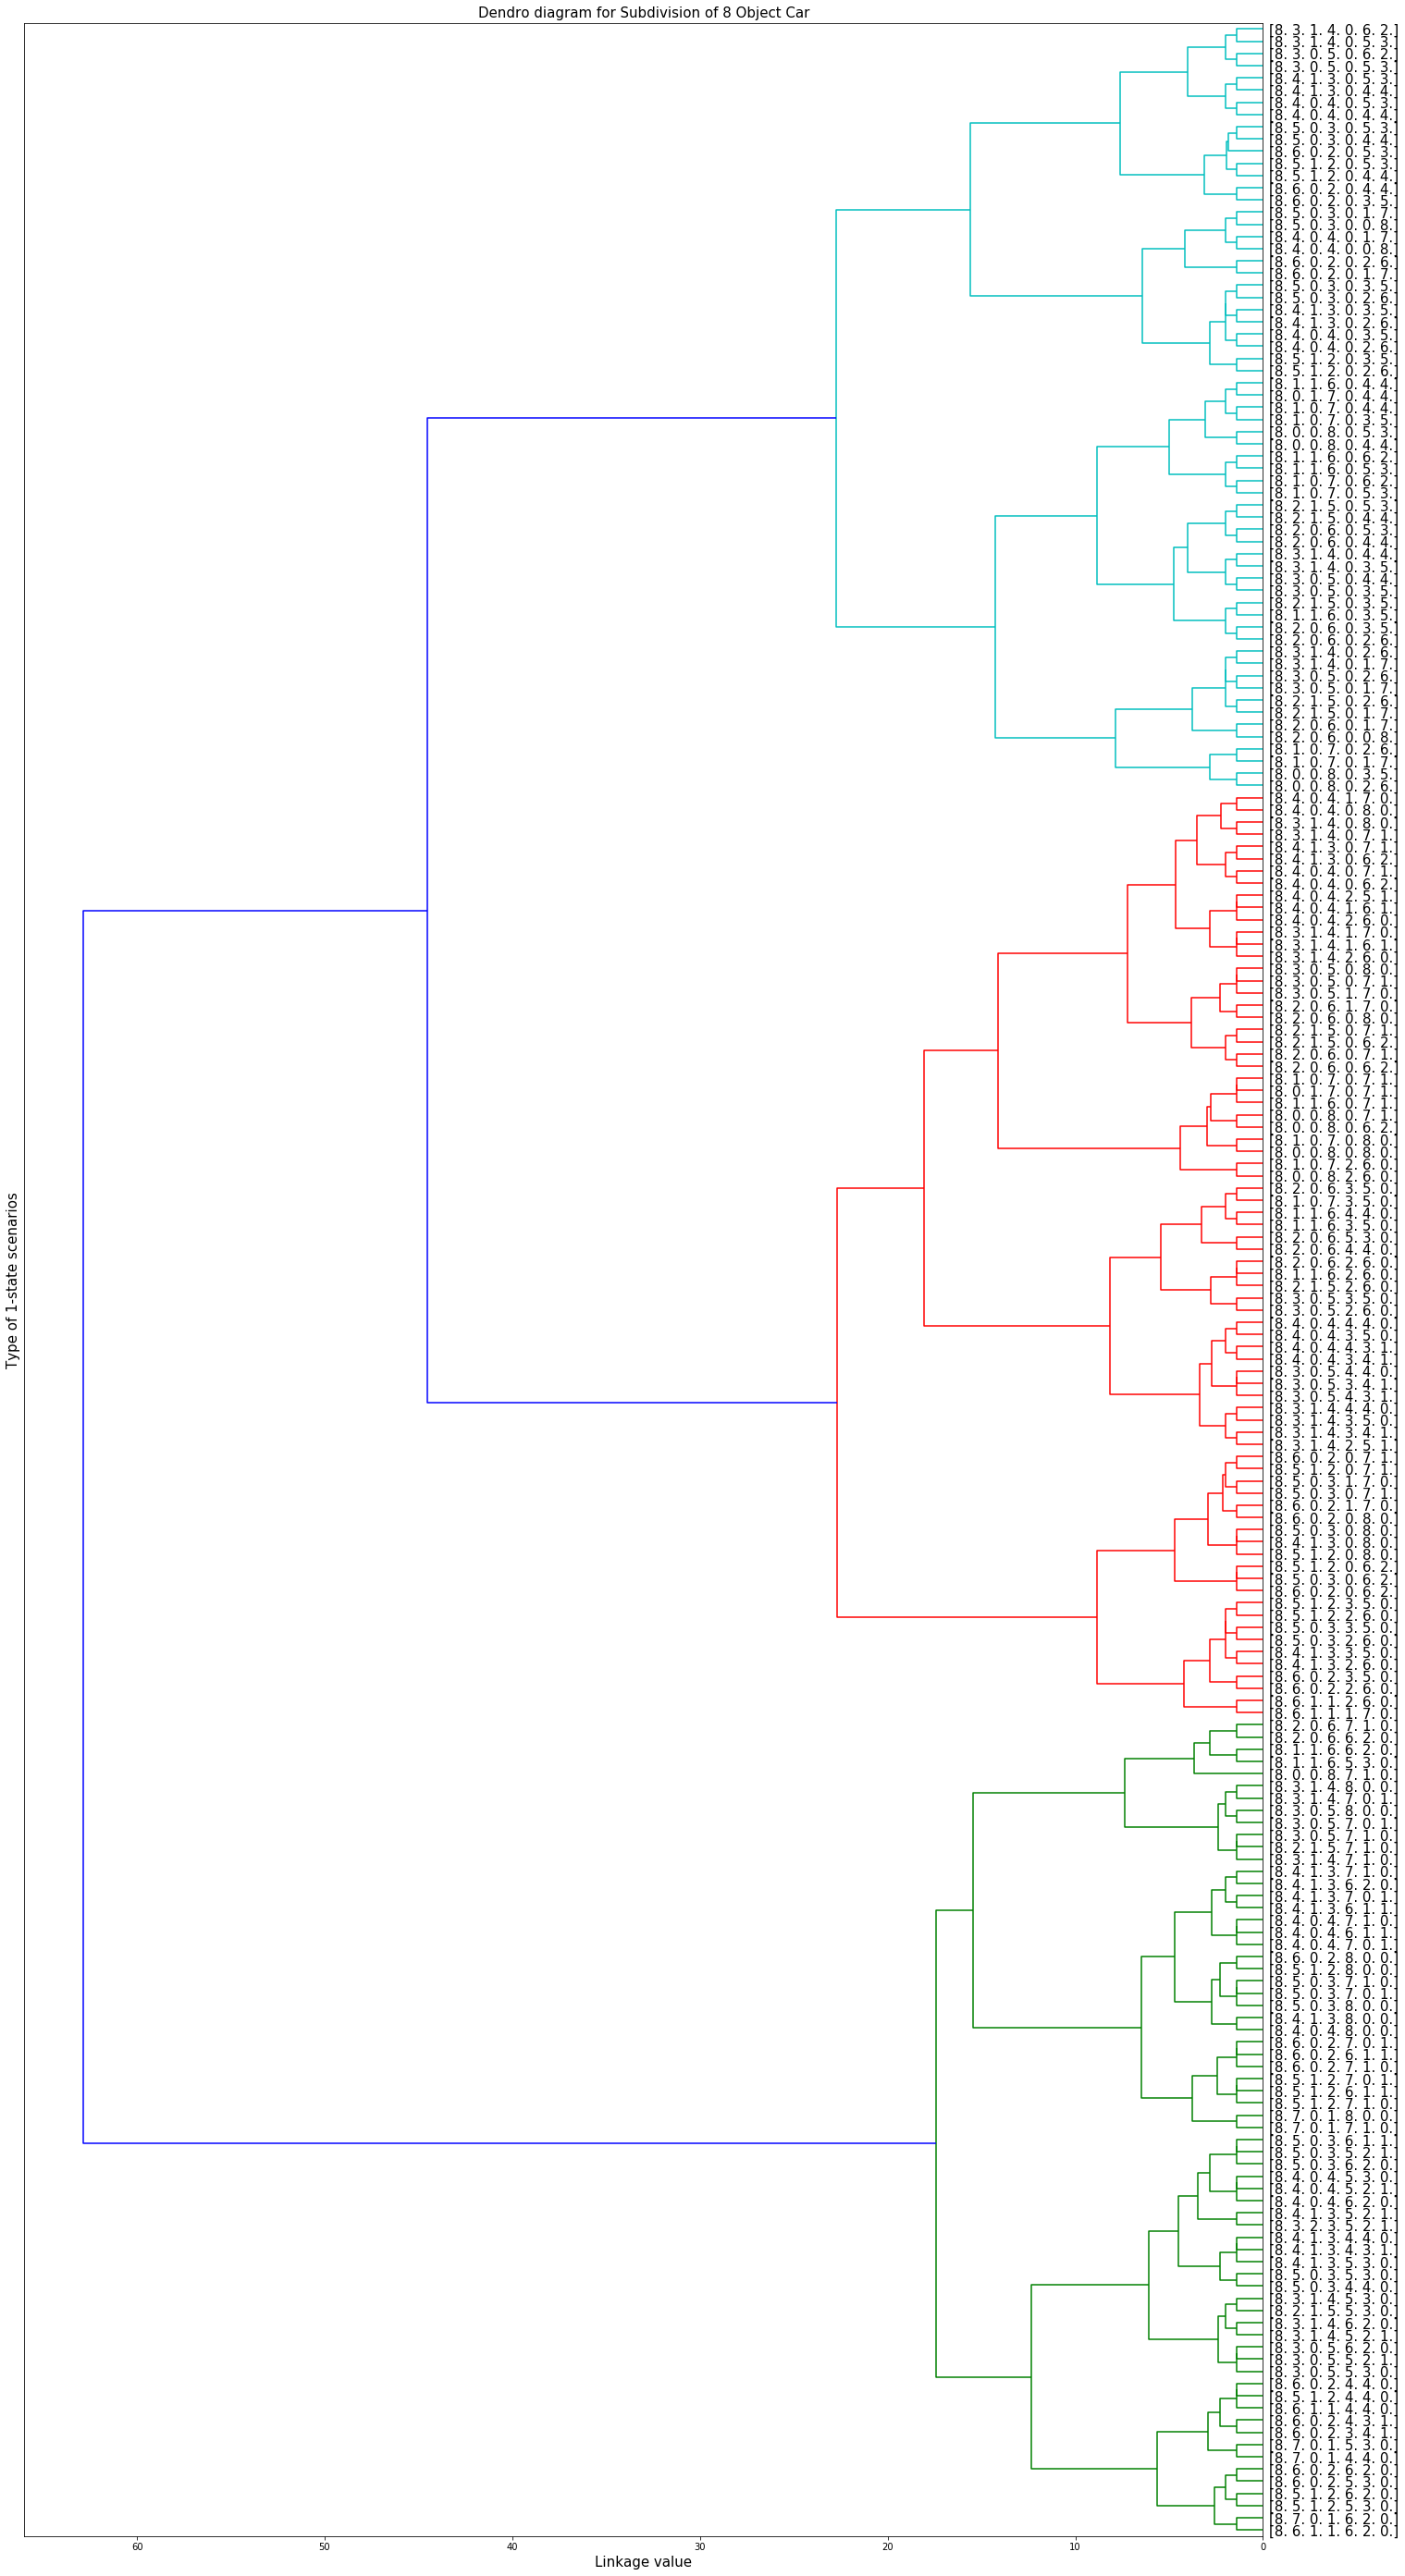

(205, 4)


In [44]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car8, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(24, 50))
plt.title('Dendro diagram for Subdivision of 8 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str8, leaf_rotation=0,orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)

In [45]:
car9 = matrix_1st[np.where(matrix_1st[:,0]==9),:]
car9 = car9[:,1:]
car9 = np.squeeze(car9,axis= (0,))
str9 = ";".join(str(i) for i in car9)
str9 = str9.split(";")
str9

['[9. 0. 0. 9. 0. 2. 7.]',
 '[9. 0. 0. 9. 0. 3. 6.]',
 '[9. 0. 0. 9. 0. 4. 5.]',
 '[9. 0. 0. 9. 0. 5. 4.]',
 '[9. 0. 0. 9. 0. 6. 3.]',
 '[9. 0. 0. 9. 0. 7. 2.]',
 '[9. 0. 0. 9. 0. 8. 1.]',
 '[9. 0. 0. 9. 0. 9. 0.]',
 '[9. 0. 0. 9. 8. 1. 0.]',
 '[9. 1. 0. 8. 0. 4. 5.]',
 '[9. 1. 0. 8. 0. 5. 4.]',
 '[9. 1. 0. 8. 0. 6. 3.]',
 '[9. 1. 0. 8. 0. 7. 2.]',
 '[9. 1. 0. 8. 0. 8. 1.]',
 '[9. 1. 0. 8. 0. 9. 0.]',
 '[9. 1. 0. 8. 2. 7. 0.]',
 '[9. 1. 1. 7. 0. 5. 4.]',
 '[9. 1. 1. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 2. 7.]',
 '[9. 2. 0. 7. 0. 3. 6.]',
 '[9. 2. 0. 7. 0. 4. 5.]',
 '[9. 2. 0. 7. 0. 5. 4.]',
 '[9. 2. 0. 7. 0. 6. 3.]',
 '[9. 2. 0. 7. 0. 7. 2.]',
 '[9. 2. 0. 7. 0. 8. 1.]',
 '[9. 2. 0. 7. 0. 9. 0.]',
 '[9. 2. 0. 7. 2. 7. 0.]',
 '[9. 2. 0. 7. 4. 5. 0.]',
 '[9. 2. 0. 7. 5. 4. 0.]',
 '[9. 2. 1. 6. 0. 2. 7.]',
 '[9. 2. 1. 6. 0. 4. 5.]',
 '[9. 2. 1. 6. 0. 5. 4.]',
 '[9. 2. 1. 6. 0. 6. 3.]',
 '[9. 2. 1. 6. 0. 7. 2.]',
 '[9. 2. 1. 6. 0. 8. 1.]',
 '[9. 2. 1. 6. 0. 9. 0.]',
 '[9. 2. 1. 6. 5. 4. 0.]',
 

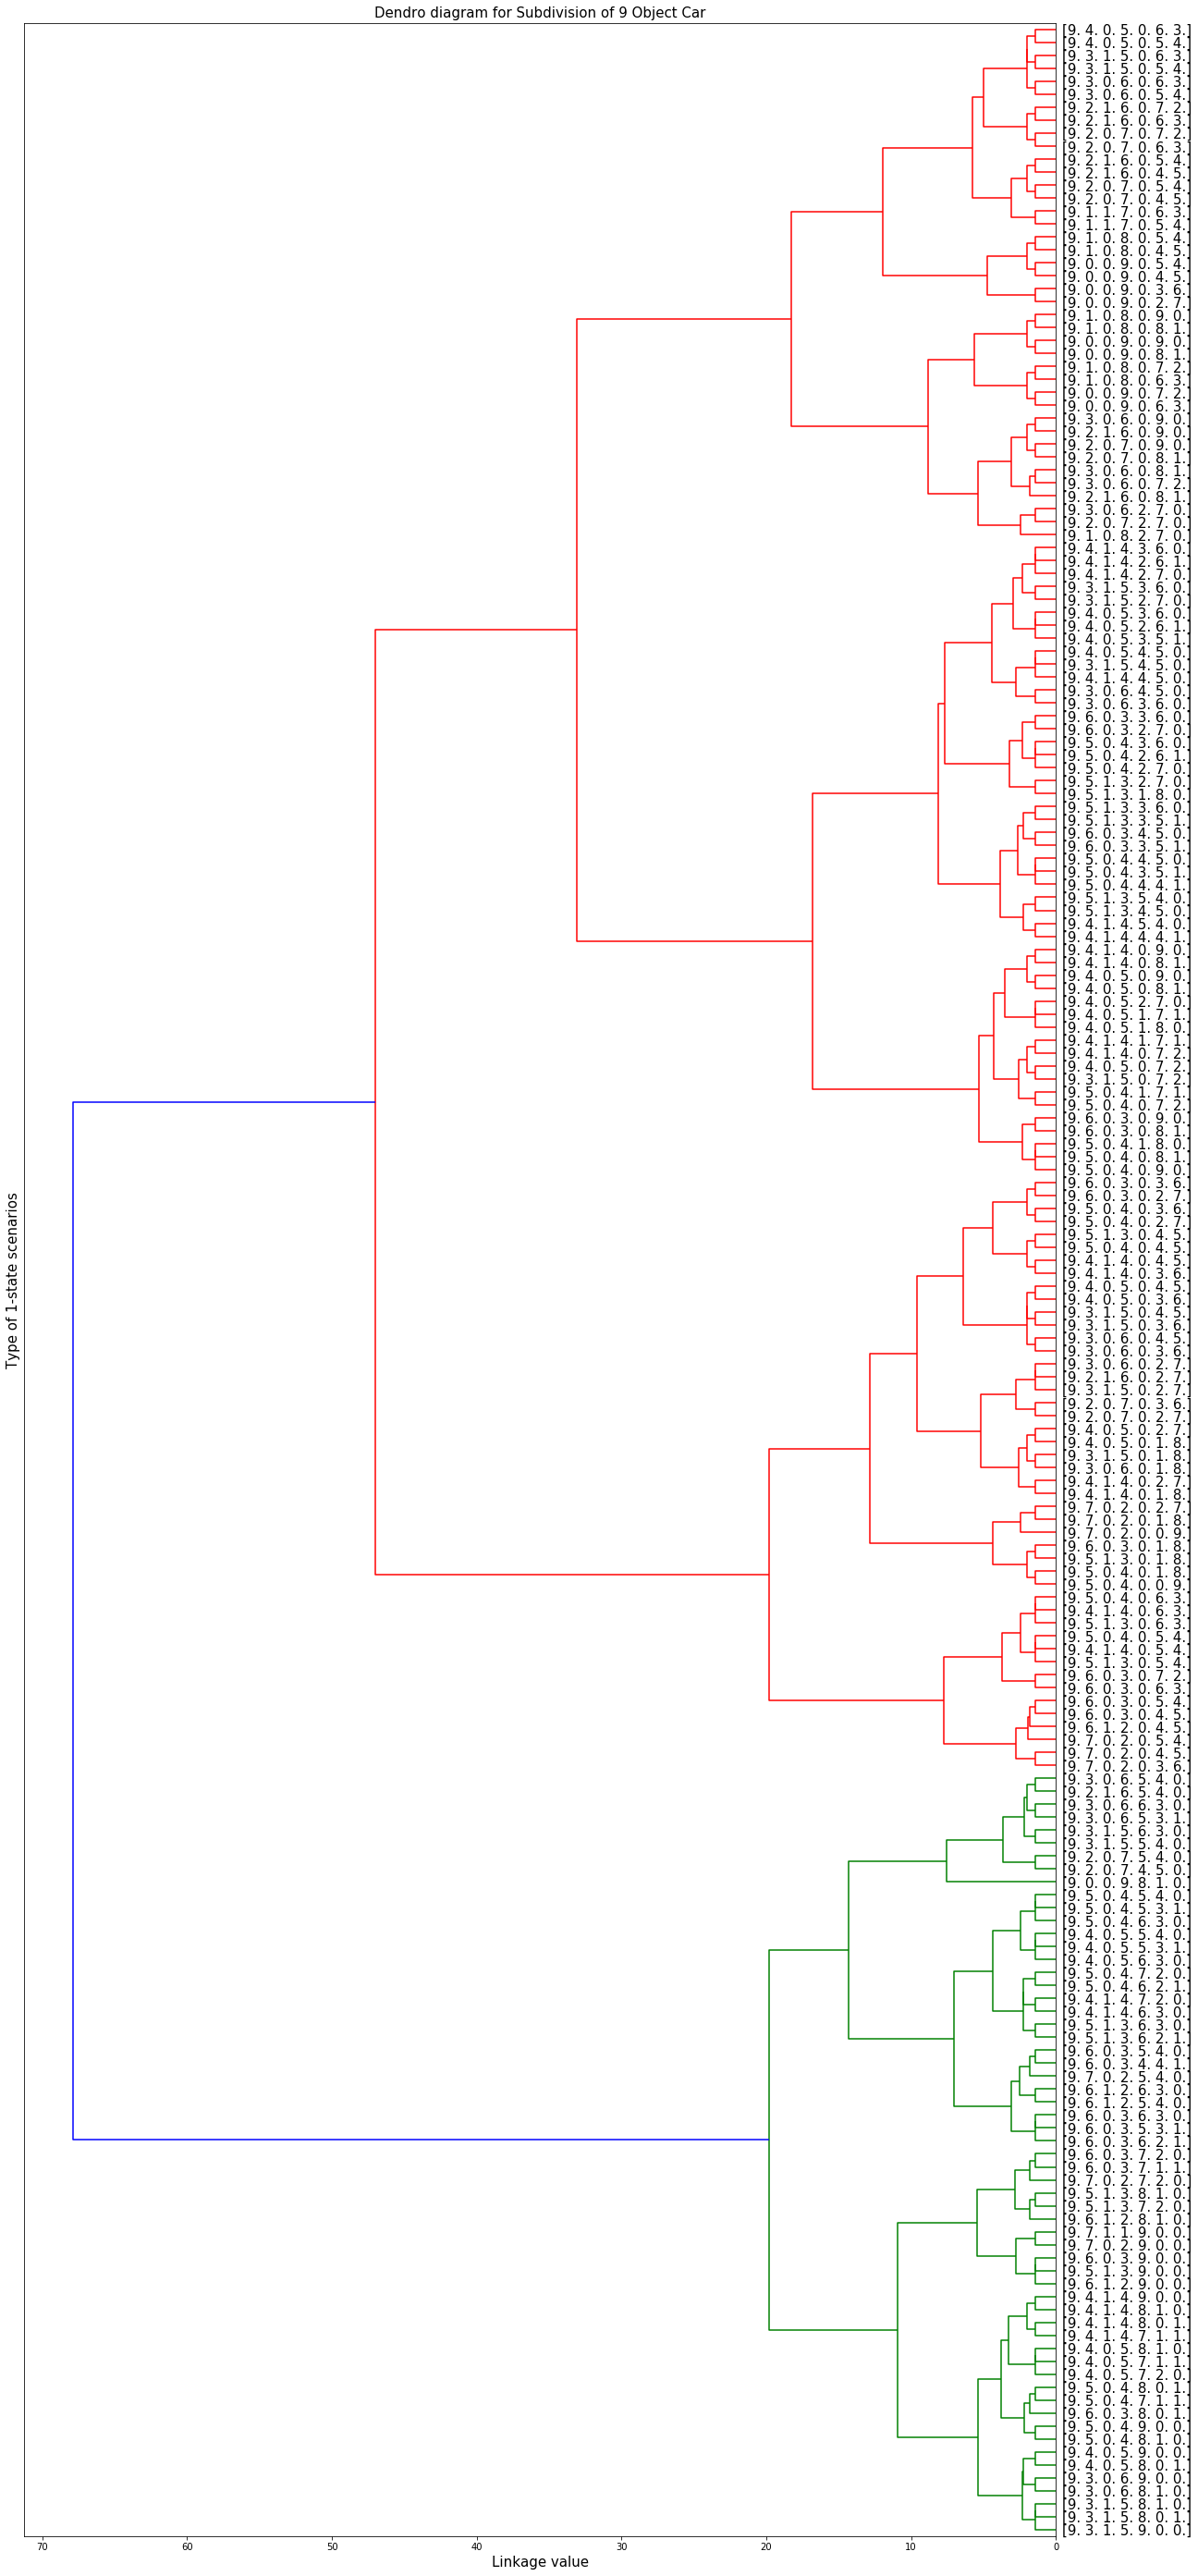

(193, 4)


In [46]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster
from matplotlib import pyplot as plt

Z = linkage(car9, 'ward')
f = fcluster(Z,20,'distance')
fig = plt.figure(figsize=(20, 50))
plt.title('Dendro diagram for Subdivision of 9 Object Car',fontsize = 15)
plt.ylabel('Type of 1-state scenarios',fontsize = 15)
plt.xlabel('Linkage value',fontsize = 15)
dn = dendrogram(Z,labels=str9, orientation ='left',
              leaf_font_size=15)
plt.show()
print(Z.shape)